# Single Entity AI Inference Service : Buyer Side

The code below uses a Dopamine service for classifying an image and pays 100 DOPA weis for it

for running this sample we need the following libraries:

In [1]:
import dopapy
import dopapy.types as dd
import dopapy.trading as dp
from PIL import Image 
from urllib.request import urlopen
from IPython.display import display

In [2]:
import warnings
warnings.filterwarnings('ignore') #Thats just to ignore warnings that are irrelevant for this type of sample

Creating a session object that represents the web service hosted by the user,
this session will have access to a local Ethereum wallet in keystore_dir_a:

In [3]:
session = dp.create_session(master_password='password123456',
                            keystore_dir='/data/dopamine/keystore_dir_a/',
                            web_server_host="127.0.0.1",
                            web_server_port=8004,
                            dopmn_budget=10000,
                            ether_budget=int(10E18))

Checking balance before the trade:

In [4]:
print('DOPA Balance:',session.wallet.dopmn_balance)
print('ETH  Balance:',session.wallet.ether_balance)

DOPA Balance: 1000000000007831
ETH  Balance: 78677382600000000000


Getting a handle to a remote, counter quote:

In [5]:
counter_quote = dp.get_counter_quote(url="https://127.0.0.1:8003", quote_id=0)

Describing the input and output of the service i'd like to use, the service should get an image and output a string,
and I'm willing to work only with specific remote source. (In future examples we will show how to use the dopamine board or dopamine certificates to find the best service provider that fits my needs):

In [6]:
service_descriptor = dd.ServiceDescriptor(dd.ServiceRole.CONSUMER,
                                          output_descriptors=[dd.StringDescriptor()],
                                          input_descriptors=[dd.ImageDescriptor()],
                                          remote_sources=[counter_quote])

Creating a quote for consuming the given service for no more than 100 DOPA weis:

In [7]:
my_quote = dp.create_quote_services(session=session,
                                    service_descriptor=service_descriptor,
                                    side=dp.BUY,
                                    reward_descriptor=dp.create_reward_descriptor(max_dopamine_price=int(100)))

Load and display the image to be classified:

Loading image...


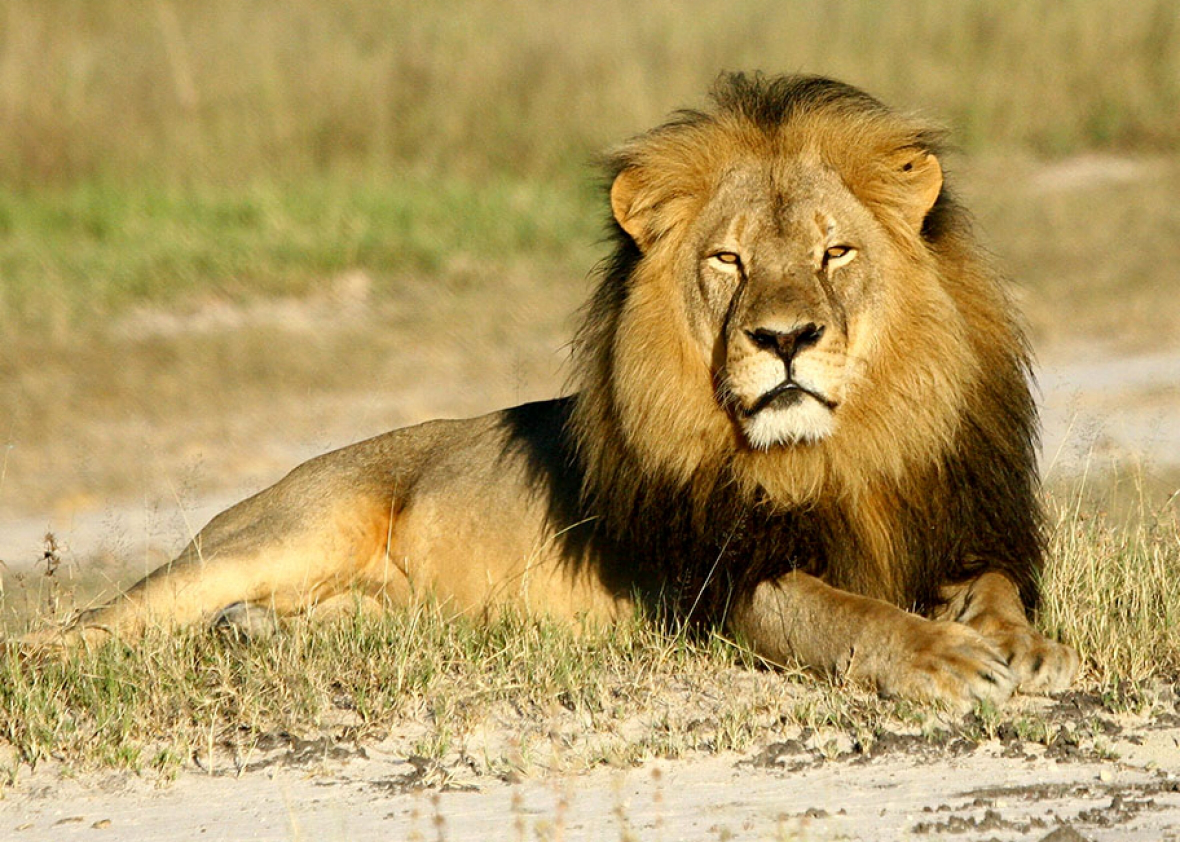

In [8]:
print("Loading image...")
imageurl = "http://www.slate.com/content/dam/slate/articles/health_and_science/science/2015/07/150730_SCI_Cecil_lion.jpg.CROP.promo-xlarge2.jpg"
img =Image.open(urlopen(imageurl))
display(img)

Getting a handle for the given service and executing it:

In [9]:
ai_result = my_quote.get_service().call(dd.Image(img))

Checking the result:

In [10]:
ai_result.value

'lion'

Checking balance after the trade:

In [11]:
print('DOPA Balance:',session.wallet.dopmn_balance)
print('ETH  Balance:',session.wallet.ether_balance)

DOPA Balance: 1000000000007731
ETH  Balance: 78656686200000000000
